# Introducing the Discrete Fourier Transform (DFT)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### The Collocation Problem with Trigonometric Basis Functions

###### The form of the trigonometric polynomial that we will study in this course is defined
$$\sum_{k=\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\cos(kx) + b_k\sin(kx) = f(x)$$

$N_k$ is the number of frequencies and $j$ can range up to the number of grid-points for $x$.

###### We could determine the coefficients $a_k$ and $b_k$ by collocation (the direct method) and invert a matrix.

$$\sum_{k=\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\cos(kx_j) + b_k\sin(kx_j) = f_j$$

###### <font color=red>But we do not need to set up a system of equations. We can use orthogonality of $\sin(kx)$ and $\cos(kx)$ over $x\in[-\pi,\pi]$ to compute the coefficients using quadrature. In fact, we will use the trapezoidal rule!

###### You proved that

$$\frac1{L}\int_{-L}^L\cos\left(\frac{2\pi}L mx\right)\cos\left(\frac{2\pi}L nx\right)\,dx = \delta_{mn}$$

$$\frac1{L}\int_{-L}^L\sin\left(\frac{2\pi}L mx\right)\sin\left(\frac{2\pi}L nx\right)\,dx = \delta_{mn}$$

$$\frac1{L}\int_{-L}^L\cos\left(\frac{2\pi}L mx\right)\sin\left(\frac{2\pi}L nx\right)\,dx = 0$$

###### So we can determine $a_n$ by using orthogonality as follows:

$$\sum_{k=\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\cos(kx) + b_k\sin(kx) = f(x)$$

$$\sum_{k=\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\left(\cos(kx),\cos(nx)\right) + b_k\left(\sin(kx),\cos(nx)\right) = \left(f(x),\cos(nx)\right)$$

$$\sum_{k=\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\delta_{kn} + b_k0 = \left(f(x),\cos(nx)\right)$$

$$a_n = \left(f(x),\cos(nx)\right)_{w=\frac1{2\pi}}$$

###### We can determine $b_n$ by using orthogonality as follows:

$$\sum_{k=\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\cos(kx) + b_k\sin(kx) = f(x)$$

$$\sum_{k=\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\left(\cos(kx),\sin(nx)\right) + b_k\left(\sin(kx),\sin(nx)\right) = \left(f(x),\sin(nx)\right)$$

$$\sum_{k=\frac{N_k}{2}+1}^{\frac{N_k}2} a_k0 + b_k\delta{kn} = \left(f(x),\sin(nx)\right)$$

$$b_n = \left(f(x),\sin(nx)\right)_{w=\frac1{2\pi}}$$

### Fourier Coefficients and the Fourier Cosine Transform and Fourier Sine Transform

###### The Fourier Cosine Coefficient is given by $$a_k = (f,\cos(kx)) = \frac1{2\pi}\int_{-\pi}^\pi f(x)\cos(kx)\,dx$$

###### The Fourier Sine Coefficient is given by $$b_k = (f,\sin(kx)) = \frac1{2\pi}\int_{-\pi}^\pi f(x)\sin(kx)\,dx$$

###### But our data will be discrete, so we need to approximate these coefficients using a quadrature rule. We will use the trapezoidal rule and this discretization results in the so-called Discrete Fourier Transform.

### Discrete Fourier Transform (DFT)

###### In order to compute the DFT over a frequency grid you will need to write an algorithm that
* executes the trapezoidal rule
* over a grid for $x$
* at each frequency $k$

<font color=red>That means that you will implement the trapezoidal rule using a matrix (vectorization).

###### To get a feel for this kind of computation, we can compute the following integrals using the trapezoidal rule with $n = 8$ grid points.

###### $f(x)=1x$ $$a_0 = \int_0^1\,1\,x\,dx \approx \sum_{j=0}^71\,x_j\,\,w_j$$

###### $$\begin{pmatrix}
1x_0 & 1x_1 & 1x_2 & \ldots & 1x_7
\end{pmatrix}\begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_7 \\
\end{pmatrix}
=
a_0$$
where $w_0 = \frac12h$, $w_1 = 1h$, $w_2 = 1h$,$\ldots$, $w_7=\frac12h$ where $h=\frac17$ and the computed coefficient is $a_0 = \frac12$

In [2]:
npts=8
k=1
x=np.linspace(0,1,npts)
h=(x[-1]-x[0])/(npts-1)
w=np.ones(npts)
w[0],w[-1]=.5,.5
w=h*w
f=k*x
print('a0={}'.format(f.dot(w)))

a0=0.49999999999999994


###### $f(x)=2x$ $$a_1=\int_0^1\,2\,x\,dx \approx \sum_{j=0}^72\,x_j\,w_j$$

###### $$\begin{pmatrix}
2x_0 & 2x_1 & 2x_2 & \ldots & 2x_7
\end{pmatrix}\begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_7 \\
\end{pmatrix}
=
a_1$$
where $w_0 = \frac12h$, $w_1 = 1h$, $w_2 = 1h$,$\ldots$, $w_7=\frac12h$ where $h=\frac17$ and the computed coefficient is $a_1 = 1$

In [3]:
npts=8
k=2
x=np.linspace(0,1,npts)
h=(x[-1]-x[0])/(npts-1)
w=np.ones(npts)
w[0],w[-1]=.5,.5
w=h*w
f=k*x
print('a1={}'.format(f.dot(w)))

a1=0.9999999999999999


###### $f(x)=3x$ $$a_2=\int_0^1\,3\,x\,dx \approx \sum_{j=0}^73\,x_j\,w_j$$

###### $$\begin{pmatrix}
3x_0 & 3x_1 & 3x_2 & \ldots & 3x_7
\end{pmatrix}\begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_7 \\
\end{pmatrix}
=
a_2$$
where $w_0 = \frac12h$, $w_1 = 1h$, $w_2 = 1h$,$\ldots$, $w_7=\frac12h$ where $h=\frac17$ and the computed coefficient is $a_2 = \frac32$

In [4]:
npts=8
k=3
x=np.linspace(0,1,npts)
h=(x[-1]-x[0])/(npts-1)
w=np.ones(npts)
w[0],w[-1]=.5,.5
w=h*w
f=k*x
print('a2={}'.format(f.dot(w)))

a2=1.4999999999999998


###### Now combine these three separate computations into one matrix-vector multiply.

###### $$\begin{pmatrix}
1x_0 & 1x_1 & 1x_2 & \ldots & 1x_7\\
2x_0 & 2x_1 & 2x_2 & \ldots & 2x_7\\
3x_0 & 3x_1 & 3x_2 & \ldots & 3x_7
\end{pmatrix}\begin{pmatrix}
w_0 \\ w_1 \\ w_2 \\ \ldots \\ w_7
\end{pmatrix}
=
\begin{pmatrix}
a_0 \\ a_1 \\ a_2
\end{pmatrix}$$
where $w_0 = \frac12h$, $w_1 = 1h$, $w_2 = 1h$,$\ldots$, $w_7=\frac12h$ where $h=\frac17$ and the computed coefficients are $a_0 = \frac12$, $a_1 = 1$, $a_2 = \frac32$.

In [6]:
npts=8
x=np.linspace(0,1,npts)
h=(x[-1]-x[0])/(npts-1)
k=np.arange(1,4)
k=np.c_[k]

w=np.ones(npts)
w[0],w[-1]=.5,.5
w=h*w
f=k*x
a=f.dot(w)
print('a={}'.format(a))

a=[0.5 1.  1.5]


### Discrete Cosine Transform (DCT)

###### What is the algorithm for the Fourier cosine coefficient $\displaystyle a_k = \frac1{\pi}\int_{-\pi}^\pi f(x)\cos(kx)\,dx$?

###### Let $N_k = 8$ (frequency grid) and $npts = 16$ (x grid) to start. Notice that
* $h = \frac{2\pi}{npts-1}$ so multiplying by $\frac{1}{2\pi}$ yields a factor of $\frac{1}{npts-1}$ in front of the trapezoidal rule
* The integrand is assumed to be $2\pi$ periodic so we can discard one of the endpoints and we will choose the left endpoint
* The weights for the trapezoidal rule are $\vec{w} = [\frac12, 1, 1, \ldots, 1, \frac12]$ but the assumption of periodicity means that we assume that the first and final endpoints yield the same result, so we are adding them together in the sum yielding $\vec{w} = [1, 1, 1, \ldots, 1]$
* Computationally we can ignore the weight vector and simply compute the dot product of $f(x)$ and the cosine kernel.

In [7]:
Nk=8
npts=17
x=np.linspace(-np.pi,np.pi,npts)
x=x[:-1]
k=np.arange(-Nk/2+1,Nk/2+1)
k=np.c_[k]
f=1/np.cosh(x)
C=np.cos(k*x)
a=C.dot(f)/(npts-1)
print(a)

[ 1.21012978e-02  3.72813532e-02  2.13361834e-01  4.72155564e-01
  2.13361834e-01  3.72813532e-02  1.21012978e-02 -1.42782306e-04]


###### Collocate the function $f(x) = \frac1{\cosh(x)}$

######  $b_k=0~\forall k$ so the trigonometric interpolant (Fourier series) is (Cosine series) $$\sum_{k=\frac{N_k}{2}+1}^{\frac{N_k}2} a_k\cos(kx_j) = f_j$$

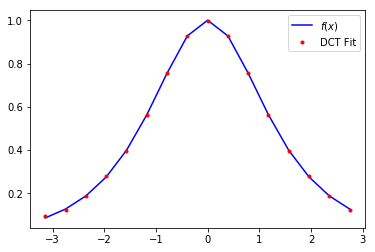

In [8]:
plt.plot(x,f,'b',x,a.dot(C),'r.')
plt.legend(['$f(x)$','DCT Fit']);

### Discrete Sine Transform (DST)

###### What is the algorithm for the Fourier sine coefficient $\displaystyle b_k = \frac1{\pi}\int_{-\frac\pi2}^{\frac\pi2} f(x)\sin(kx)\,dx$?

In [9]:
Nk=8
npts=17
x=np.linspace(-np.pi,np.pi,npts)
x=x[:-1]
k=np.arange(-Nk/2+1,Nk/2+1)
k=np.c_[k]
f=np.tanh(2*x)
S=np.sin(k*x)
b=S.dot(f)/(npts-1)
print(b)

[-0.14133913  0.0422619  -0.60200155  0.          0.60200155 -0.0422619
  0.14133913 -0.04089272]


###### Collocate the function $f(x) = \tanh(2x)$

######  $a_k=0~\forall k$ so the trigonometric interpolant (Fourier series) is (Sine series) $$\sum_{k=\frac{N_k}{2}+1}^{\frac{N_k}2} b_k\sin(kx_j) = f_j$$

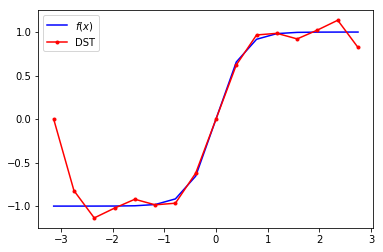

In [10]:
plt.plot(x,f,'b',x,b.dot(S),'r.-')
plt.legend(['$f(x)$','DST']);

###### What happened at the left endpoint? How can we fix it?

In [16]:
Nk=24
npts=32
x=np.linspace(-np.pi,np.pi,npts)
x=x[1:-1]
k=np.arange(-Nk/2+1,Nk/2+1)
k=np.c_[k]
f=np.tanh(2*x)
S=np.sin(k*x)
b=S.dot(f)/(npts-2)
print(b)

[-0.01644221  0.0205761  -0.02624171  0.03072067 -0.04094471  0.04324935
 -0.07023869  0.05530663 -0.15565444  0.04994622 -0.62518246  0.
  0.62518246 -0.04994622  0.15565444 -0.05530663  0.07023869 -0.04324935
  0.04094471 -0.03072067  0.02624171 -0.0205761   0.01644221 -0.01230337]


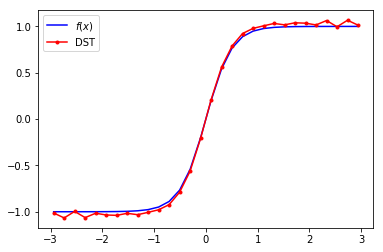

In [17]:
plt.plot(x,f,'b',x,b.dot(S),'r.-')
plt.legend(['$f(x)$','DST']);